## Import Data

In [27]:
import pandas as pd

df = pd.read_csv("absorbance.csv")

In [28]:
wba_df = df.iloc[:,39:]
wba_df

,f(226.0000),f(257.3256),f(280.6155),f(297.3018),f(324.2099),f(343.4884),f(363.9133),f(385.5527),f(408.4789),f(432.7683),...,f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
0,0.0987,0.1274,0.1592,0.1737,0.1700,0.1617,0.1640,0.1799,0.1932,0.1969,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.2047,0.2090,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,0.1096,0.1509,0.1941,0.2156,0.2139,0.2065,0.2172,0.2413,0.2607,0.2706,...,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,0.0748,0.0953,0.1190,0.1285,0.1233,0.1151,0.1169,0.1294,0.1411,0.1465,...,0.0077,0.0123,0.0066,-0.0024,0.0126,0.0231,0.0405,0.0401,0.0391,0.0258
4,0.1863,0.2230,0.2641,0.2836,0.2794,0.2685,0.2701,0.2846,0.3011,0.3072,...,0.2332,0.2216,0.2228,0.2653,0.2596,0.2576,0.2838,0.3598,0.3953,0.3642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0.0663,0.0736,0.1023,0.1360,0.1672,0.1821,0.1816,0.1662,0.1411,0.1296,...,0.2221,0.1930,0.1592,0.1549,0.1346,0.1250,0.1125,0.1242,0.1356,0.1372
235,0.0688,0.0738,0.0951,0.1238,0.1484,0.1611,0.1607,0.1484,0.1290,0.1222,...,0.5130,0.4766,0.4316,0.4108,0.3587,0.3216,0.2877,0.3026,0.2838,0.2682
236,0.1016,0.1186,0.1060,0.2803,0.1910,0.1980,0.1089,0.0182,-0.0759,0.1993,...,0.6157,0.5506,0.4832,0.4501,0.3983,0.3545,0.3115,0.3136,0.2871,0.2679
237,0.0366,0.0414,0.0577,0.0803,0.0986,0.0925,0.0468,0.0273,0.0332,0.0430,...,0.3333,0.2819,0.2302,0.2029,0.1586,0.1279,0.0934,0.0612,0.0427,0.0031


In [29]:
wba_df.values

array([[0.0987, 0.1274, 0.1592, ..., 0.253 , 0.2282, 0.2003],
       [0.1114, 0.1501, 0.186 , ..., 0.2048, 0.1917, 0.1659],
       [0.1096, 0.1509, 0.1941, ..., 0.3237, 0.3056, 0.2881],
       ...,
       [0.1016, 0.1186, 0.106 , ..., 0.3136, 0.2871, 0.2679],
       [0.0366, 0.0414, 0.0577, ..., 0.0612, 0.0427, 0.0031],
       [0.0267, 0.0294, 0.0424, ..., 0.4081, 0.3874, 0.3852]])

<AxesSubplot:xlabel='variable', ylabel='value'>

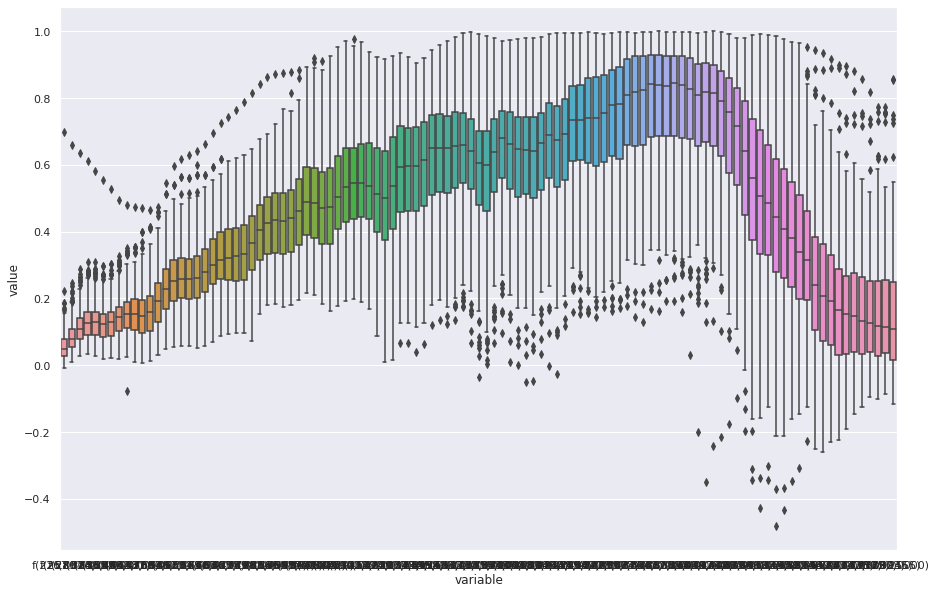

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})
wba_df_scatter = df.iloc[:,39:].melt()
sns.boxplot(x="variable", y="value", data=wba_df_scatter)

## GAN Model

In [31]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

torch.manual_seed(111)

In [32]:
train_set = torch.tensor(wba_df.values, dtype=torch.float32)
train_set.shape

torch.Size([239, 107])

In [33]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [34]:
latent_shape_size = 15
wba_frequencies = 107

In [35]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(latent_shape_size, 64),
        nn.LeakyReLU(0.1),
        nn.Linear(64, 128),
        nn.LeakyReLU(0.1),
        nn.Linear(128, 107)
    )
  
  def forward(self, x):
    output = self.model(x)
    return output

generator = Generator()

In [36]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(wba_frequencies, 16),
        nn.LeakyReLU(0.1),
        nn.Linear(16, 32),
        nn.LeakyReLU(0.1),
        nn.Linear(32, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    output = self.model(x)
    return output

discriminator = Discriminator()

In [37]:
lr = 0.001
num_epochs = 500
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [41]:
for epoch in range(num_epochs): # 1 min per 10 epochs
  for n, real_samples in enumerate(train_loader):
    if len(real_samples) != batch_size:
      continue
    
    # Data for training the discriminator
    real_samples_labels = torch.ones((batch_size, 1))
    latent_space_samples = torch.randn((batch_size, latent_shape_size))
    generated_samples = generator(latent_space_samples)
    generated_samples_labels = torch.zeros((batch_size, 1))
    all_samples = torch.cat((real_samples, generated_samples))
    all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

    # Training the discriminator
    # discriminator.zero_grad()
    output_discriminator = discriminator(all_samples)
    loss_discriminator = loss_function(output_discriminator, all_samples_labels)
    optimizer_discriminator.zero_grad()
    loss_discriminator.backward()
    optimizer_discriminator.step()

    # Data for training the generator
    latent_space_samples = torch.randn((batch_size, latent_shape_size))

    # Training the generator
    # generator.zero_grad()
    generated_samples = generator(latent_space_samples)
    output_discriminator_generated = discriminator(generated_samples)
    loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
    optimizer_generator.zero_grad()
    loss_generator.backward()
    optimizer_generator.step()
    
    # Show loss
    if epoch % 50 == 0:
      print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
      print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.7238326072692871
Epoch: 0 Loss G.: 0.8243085741996765
Epoch: 0 Loss D.: 0.7239634990692139
Epoch: 0 Loss G.: 0.8090865612030029
Epoch: 0 Loss D.: 0.7218354940414429
Epoch: 0 Loss G.: 0.7994933128356934
Epoch: 50 Loss D.: 0.7188040018081665
Epoch: 50 Loss G.: 0.5759514570236206
Epoch: 50 Loss D.: 0.7196346521377563
Epoch: 50 Loss G.: 0.5779128074645996
Epoch: 50 Loss D.: 0.7123969793319702
Epoch: 50 Loss G.: 0.5610409379005432
Epoch: 100 Loss D.: 0.684609591960907
Epoch: 100 Loss G.: 0.5415736436843872
Epoch: 100 Loss D.: 0.678284764289856
Epoch: 100 Loss G.: 0.5398917198181152
Epoch: 100 Loss D.: 0.6797106266021729
Epoch: 100 Loss G.: 0.540890634059906
Epoch: 150 Loss D.: 0.7816604375839233
Epoch: 150 Loss G.: 0.9268090724945068
Epoch: 150 Loss D.: 0.7973276972770691
Epoch: 150 Loss G.: 0.8796279430389404
Epoch: 150 Loss D.: 0.8039310574531555
Epoch: 150 Loss G.: 0.8296195268630981
Epoch: 200 Loss D.: 0.6998240351676941
Epoch: 200 Loss G.: 0.7023262977600098
Epoch: 

<AxesSubplot:xlabel='variable', ylabel='value'>

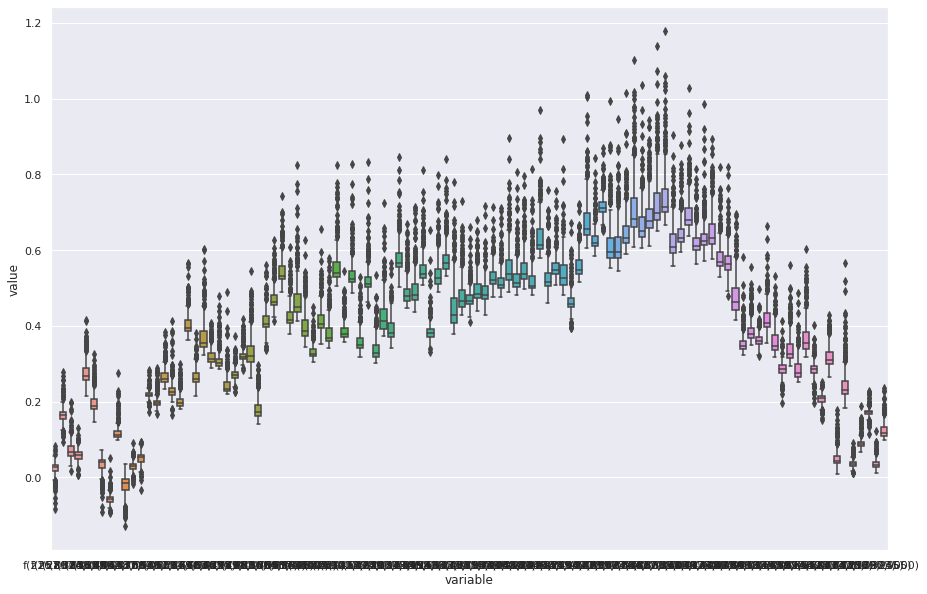

In [43]:
latent_space_samples = torch.randn((100, latent_shape_size))
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
generated_df = pd.DataFrame(generated_samples, columns=df.iloc[:,39:].columns)
wba_df_scatter = generated_df.melt()
sns.boxplot(x="variable", y="value", data=wba_df_scatter)